Câu 1: D

Câu 2: D

Câu 3: B

Câu 4:
Task: classify whether a flight is delayed. 
Dataset: airline-delay-and-cancellation-data-2009-2018/2018.csv

In [1]:
import numpy as np 
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics


import category_encoders as ce


import seaborn as sn
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv("D:/Vicohub/airline-delay-and-cancellation-data-2009-2018/2018.csv")

#explore data

print(data.head())

FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2018-01-01         UA               2429    EWR  DEN          1517   
1  2018-01-01         UA               2427    LAS  SFO          1115   
2  2018-01-01         UA               2426    SNA  DEN          1335   
3  2018-01-01         UA               2425    RSW  ORD          1546   
4  2018-01-01         UA               2424    ORD  ALB           630   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0    1512.0       -5.0      15.0      1527.0  ...             268.0   
1    1107.0       -8.0      11.0      1118.0  ...              99.0   
2    1330.0       -5.0      15.0      1345.0  ...             134.0   
3    1552.0        6.0      19.0      1611.0  ...             190.0   
4     650.0       20.0      13.0       703.0  ...             112.0   

   ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
0                250.0     225.0    1605.0            NaN            NaN   
1                 83.0      65.0     414.0            NaN            NaN   
2                126.0     106.0     846.0            NaN            NaN   
3                182.0     157.0    1120.0            NaN            NaN   
4                106.0      83.0     723.0            NaN            NaN   

  NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 27  
0       NaN             NaN                  NaN          NaN  
1       NaN             NaN                  NaN          NaN  
2       NaN             NaN                  NaN          NaN  
3       NaN             NaN                  NaN          NaN  
4       NaN             NaN                  NaN          NaN  

[5 rows x 28 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [4]:
info1= data.describe()
print(info1)

       OP_CARRIER_FL_NUM  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  \
count       7.213446e+06  7.213446e+06  7.101129e+06  7.096212e+06   
mean        2.607531e+03  1.329687e+03  1.333854e+03  9.969858e+00   
std         1.860122e+03  4.909320e+02  5.045055e+02  4.482964e+01   
min         1.000000e+00  1.000000e+00  1.000000e+00 -1.220000e+02   
25%         1.029000e+03  9.150000e+02  9.160000e+02 -5.000000e+00   
50%         2.131000e+03  1.320000e+03  1.326000e+03 -2.000000e+00   
75%         4.074000e+03  1.735000e+03  1.744000e+03  7.000000e+00   
max         7.909000e+03  2.359000e+03  2.400000e+03  2.710000e+03   

           TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME  \
count  7.097616e+06  7.097617e+06  7.094200e+06  7.094200e+06  7.213446e+06   
mean   1.741061e+01  1.357799e+03  1.462162e+03  7.601246e+00  1.486341e+03   
std    9.920409e+00  5.059721e+02  5.334675e+02  6.064797e+00  5.183124e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.00

In [ ]:
#checking NA data

data.ORIGIN.unique()
data.ORIGIN.isnull().sum()


data.DEST.unique()
data.DEST.isnull().sum()


data.DIVERTED.unique()
data.DIVERTED.isnull().sum()
data.groupby(['DIVERTED'], as_index=False).count()

data.DEP_TIME.unique()
data.DEP_TIME.isnull().sum()
data.groupby(['DEP_TIME'], as_index=False).count()

data.DEP_DELAY.unique()
data.DEP_DELAY.isnull().sum()
data.groupby(['DEP_DELAY'], as_index=False).count()

data.TAXI_OUT.unique()
data.TAXI_OUT.isnull().sum()
data.groupby(['TAXI_OUT'], as_index=False).count()

 


data.LATE_AIRCRAFT_DELAY.unique()
data.LATE_AIRCRAFT_DELAY.isnull().sum() #too many NULL value --> ignore this column

data.SECURITY_DELAY.unique()
data.SECURITY_DELAY.isnull().sum()#too many NULL value --> ignore this column
data.groupby(['SECURITY_DELAY'], as_index=False).count()


data.NAS_DELAY.unique()
data.NAS_DELAY.isnull().sum()#too many NULL value --> ignore this column
data.groupby(['NAS_DELAY'], as_index=False).count()

data.WEATHER_DELAY.unique()
data.WEATHER_DELAY.isnull().sum()#too many NULL value --> ignore this column
data.groupby(['WEATHER_DELAY'], as_index=False).count()

data.CARRIER_DELAY.unique()
data.CARRIER_DELAY.isnull().sum()#too many NULL value --> ignore this column
data.groupby(['CARRIER_DELAY'], as_index=False).count()

data.DISTANCE.unique()
data.DISTANCE.isnull().sum()
data.groupby(['DISTANCE'], as_index=False).count()

data.AIR_TIME.unique()
data.AIR_TIME.isnull().sum()
data.groupby(['AIR_TIME'], as_index=False).count()

data.ACTUAL_ELAPSED_TIME.unique()
data.ACTUAL_ELAPSED_TIME.isnull().sum()
data.groupby(['ACTUAL_ELAPSED_TIME'], as_index=False).count()



data.CRS_ELAPSED_TIME.unique()
data.CRS_ELAPSED_TIME.isnull().sum()
data.groupby(['CRS_ELAPSED_TIME'], as_index=False).count()

data.CRS_DEP_TIME.unique()
data.CRS_DEP_TIME.isnull().sum()
data.groupby(['CRS_DEP_TIME'], as_index=False).count()

In [6]:
cor=data.corr()
#sn.heatmap(cor, annot=True)
#plt.show()
print(cor)

                     OP_CARRIER_FL_NUM  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  \
OP_CARRIER_FL_NUM             1.000000      0.008714  0.013390   0.009536   
CRS_DEP_TIME                  0.008714      1.000000  0.960140   0.104891   
DEP_TIME                      0.013390      0.960140  1.000000   0.139855   
DEP_DELAY                     0.009536      0.104891  0.139855   1.000000   
TAXI_OUT                      0.067915      0.001230  0.010476   0.056224   
WHEELS_OFF                    0.021422      0.934320  0.971433   0.129893   
WHEELS_ON                     0.016728      0.636633  0.659929   0.037976   
TAXI_IN                      -0.016601     -0.048328 -0.044007   0.009718   
CRS_ARR_TIME                  0.016117      0.688942  0.689393   0.090503   
ARR_TIME                      0.020334      0.608829  0.631263   0.030367   
ARR_DELAY                     0.019078      0.095260  0.130637   0.957282   
CANCELLED                     0.038877      0.017984  0.008084   0.026628   

In [7]:

#clean data
#fill NA=0
data.ARR_DELAY.fillna(value=0, inplace=True)
data.AIR_TIME.fillna(value=0, inplace=True)
data.ACTUAL_ELAPSED_TIME.fillna(value=0, inplace=True)
data.CRS_ELAPSED_TIME.fillna(value=0, inplace=True)
data.DEP_DELAY.fillna(value=0, inplace=True)
data.WHEELS_ON.fillna(value=0, inplace=True)
data.TAXI_IN.fillna(value=0, inplace=True)

In [8]:
#drop useless column

data.drop(['Unnamed: 27','CANCELLATION_CODE','LATE_AIRCRAFT_DELAY','SECURITY_DELAY','NAS_DELAY','WEATHER_DELAY','CARRIER_DELAY'], inplace=True, axis=1)
data.drop(['OP_CARRIER_FL_NUM','DEP_TIME','ARR_TIME','ACTUAL_ELAPSED_TIME'], inplace=True, axis=1)

#remove cancel flight
data=data[data['CANCELLED'] == 0 ] 

In [9]:

# get top 50 airport with most flight

#Depart count for Airport 
OrgAirport=data.groupby(['ORIGIN'], as_index=False).agg(        
    {      
         'FL_DATE': "count"
    }
)

OrgAirport.rename(columns = {'FL_DATE':'DepartCount', 'ORIGIN': 'Airport' }, inplace = True)


#Arrival count for Airport 

DestAirport=data.groupby(['DEST'], as_index=False).agg(
    {      
         'FL_DATE': "count"        
    })


DestAirport.rename(columns = {'FL_DATE':'ArrivalCount', 'DEST': 'Airport'}, inplace = True)


#merge 2 data set

Airport= pd.merge(OrgAirport, DestAirport, on='Airport')
Airport['Total']=Airport['DepartCount'] + Airport['ArrivalCount']


TopAirport=Airport.sort_values('Total', ascending=False).head(50)


filteredData = data[data.ORIGIN.isin(TopAirport["Airport"]) | data.DEST.isin(TopAirport["Airport"])]


#ARR_DELAY>0 --> isdelay=true
filteredData["isdelay"] = filteredData['ARR_DELAY']>0 #--> isdelay=true

# convert column "a" of a DataFrame
filteredData["FL_DATE"] = pd.to_datetime(filteredData["FL_DATE"])

#we predict isdelay, so this coulmn shout not use as feature 
filteredData.drop('ARR_DELAY', inplace=True, axis=1)

#remove original data frame for saving memory
del data

filteredData.head()



<ipython-input-9-1349823e3cef>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredData["isdelay"] = filteredData['ARR_DELAY']>0 #--> isdelay=true
<ipython-input-9-1349823e3cef>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredData["FL_DATE"] = pd.to_datetime(filteredData["FL_DATE"])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

FL_DATE OP_CARRIER ORIGIN DEST  CRS_DEP_TIME  DEP_DELAY  TAXI_OUT  \
0 2018-01-01         UA    EWR  DEN          1517       -5.0      15.0   
1 2018-01-01         UA    LAS  SFO          1115       -8.0      11.0   
2 2018-01-01         UA    SNA  DEN          1335       -5.0      15.0   
3 2018-01-01         UA    RSW  ORD          1546        6.0      19.0   
4 2018-01-01         UA    ORD  ALB           630       20.0      13.0   

   WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  CANCELLED  DIVERTED  \
0      1527.0     1712.0     10.0          1745        0.0       0.0   
1      1118.0     1223.0      7.0          1254        0.0       0.0   
2      1345.0     1631.0      5.0          1649        0.0       0.0   
3      1611.0     1748.0      6.0          1756        0.0       0.0   
4       703.0      926.0     10.0           922        0.0       0.0   

   CRS_ELAPSED_TIME  AIR_TIME  DISTANCE  isdelay  
0             268.0     225.0    1605.0    False  
1              99.0      65.0     414.0    False  
2             134.0     106.0     846.0    False  
3             190.0     157.0    1120.0    False  
4             112.0      83.0     723.0     True

In [10]:
filteredData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997489 entries, 0 to 7213445
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   OP_CARRIER        object        
 2   ORIGIN            object        
 3   DEST              object        
 4   CRS_DEP_TIME      int64         
 5   DEP_DELAY         float64       
 6   TAXI_OUT          float64       
 7   WHEELS_OFF        float64       
 8   WHEELS_ON         float64       
 9   TAXI_IN           float64       
 10  CRS_ARR_TIME      int64         
 11  CANCELLED         float64       
 12  DIVERTED          float64       
 13  CRS_ELAPSED_TIME  float64       
 14  AIR_TIME          float64       
 15  DISTANCE          float64       
 16  isdelay           bool          
dtypes: bool(1), datetime64[ns](1), float64(10), int64(2), object(3)
memory usage: 914.2+ MB


# LogisticRegression

In [11]:

#LogisticRegression

from sklearn.linear_model import LogisticRegression

x= filteredData.iloc [:, :16]
y= filteredData.iloc[:, 16:]


#x["OP_CARRIER_FL_NUM"]  = x["OP_CARRIER_FL_NUM"].astype("string_")

#x.info()
#y.info()


#del filteredData

#Converting Categorical Features
x.drop(['FL_DATE'], inplace=True, axis=1)


#one hot encoding --> cannot run due to take too memory 
# carrier = pd.get_dummies(x['OP_CARRIER'],drop_first=True)
# origin = pd.get_dummies(x['ORIGIN'],drop_first=True)
# dest = pd.get_dummies(x['DEST'],drop_first=True)

# x.drop(['OP_CARRIER'],axis=1,inplace=True)
# x.drop(['ORIGIN'],axis=1,inplace=True)
# x.drop(['DEST'],axis=1,inplace=True)
# x = pd.concat([x,carrier,origin,dest],axis=1)



#binary encoding 
encoder = ce.BinaryEncoder(cols=['OP_CARRIER'])
dfbin=encoder.fit_transform(x['OP_CARRIER'])

x = pd.concat([x,dfbin],axis=1)

x.drop(['OP_CARRIER'],axis=1,inplace=True)

encoder = ce.BinaryEncoder(cols=['ORIGIN'])
dfbin=encoder.fit_transform(x['ORIGIN'])

x = pd.concat([x,dfbin],axis=1)


x.drop(['ORIGIN'],axis=1,inplace=True)


encoder = ce.BinaryEncoder(cols=['DEST'])
dfbin=encoder.fit_transform(x['DEST'])

x = pd.concat([x,dfbin],axis=1)

x.drop(['DEST'],axis=1,inplace=True)

#scaler = StandardScaler()
#x = scaler.fit_transform(x)

del dfbin

#create test dta, training data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


#train
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train['isdelay'].ravel())

#get score
# logisticRegr.predict(x_test[0].reshape(1,-1))
score = logisticRegr.score(X_test, y_test)
print(score)

#predict
predictions = logisticRegr.predict(X_test)

# Evaluate predictions
print(accuracy_score(y_test, predictions)) #97%
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997489 entries, 0 to 7213445
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   OP_CARRIER        object        
 2   ORIGIN            object        
 3   DEST              object        
 4   CRS_DEP_TIME      int64         
 5   DEP_DELAY         float64       
 6   TAXI_OUT          float64       
 7   WHEELS_OFF        float64       
 8   WHEELS_ON         float64       
 9   TAXI_IN           float64       
 10  CRS_ARR_TIME      int64         
 11  CANCELLED         float64       
 12  DIVERTED          float64       
 13  CRS_ELAPSED_TIME  float64       
 14  AIR_TIME          float64       
 15  DISTANCE          float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(3)
memory usage: 907.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997489 entries, 0 to 7213445
Data columns (total 1 columns):
 #   Co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9779618183200496
0.9779618183200496
[[1114193   14364]
 [  24189  596627]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.98   1128557
        True       0.98      0.96      0.97    620816

    accuracy                           0.98   1749373
   macro avg       0.98      0.97      0.98   1749373
weighted avg       0.98      0.98      0.98   1749373



# Random Forests

Feature: 0, Score: 0.03701
Feature: 1, Score: 0.41230
Feature: 2, Score: 0.12366
Feature: 3, Score: 0.04585
Feature: 4, Score: 0.05779
Feature: 5, Score: 0.05287
Feature: 6, Score: 0.04570
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00164
Feature: 9, Score: 0.05619
Feature: 10, Score: 0.06961
Feature: 11, Score: 0.02747
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00233
Feature: 14, Score: 0.00292
Feature: 15, Score: 0.00298
Feature: 16, Score: 0.00370
Feature: 17, Score: 0.00316
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00062
Feature: 20, Score: 0.00173
Feature: 21, Score: 0.00296
Feature: 22, Score: 0.00351
Feature: 23, Score: 0.00379
Feature: 24, Score: 0.00374
Feature: 25, Score: 0.00398
Feature: 26, Score: 0.00396
Feature: 27, Score: 0.00385
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00057
Feature: 30, Score: 0.00160
Feature: 31, Score: 0.00237
Feature: 32, Score: 0.00367
Feature: 33, Score: 0.00371
Feature: 34, Score: 0.00384
Feature: 35, Score: 0.00342
Fe

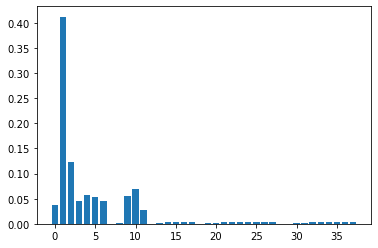

Index(['CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'OP_CARRIER_0', 'OP_CARRIER_1', 'OP_CARRIER_2',
       'OP_CARRIER_3', 'OP_CARRIER_4', 'OP_CARRIER_5', 'ORIGIN_0', 'ORIGIN_1',
       'ORIGIN_2', 'ORIGIN_3', 'ORIGIN_4', 'ORIGIN_5', 'ORIGIN_6', 'ORIGIN_7',
       'ORIGIN_8', 'ORIGIN_9', 'DEST_0', 'DEST_1', 'DEST_2', 'DEST_3',
       'DEST_4', 'DEST_5', 'DEST_6', 'DEST_7', 'DEST_8', 'DEST_9'],
      dtype='object')
0.9260346421260646
[[1094772   34000]
 [  95393  525208]]
              precision    recall  f1-score   support

       False       0.92      0.97      0.94   1128772
        True       0.94      0.85      0.89    620601

    accuracy                           0.93   1749373
   macro avg       0.93      0.91      0.92   1749373
weighted avg       0.93      0.93      0.93   1749373



In [12]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

x= filteredData.iloc [:, :16]
y= filteredData.iloc[:, 16:]


x.drop(['FL_DATE'], inplace=True, axis=1)

#binary encoding 
encoder = ce.BinaryEncoder(cols=['OP_CARRIER'])
dfbin=encoder.fit_transform(x['OP_CARRIER'])

x = pd.concat([x,dfbin],axis=1)

x.drop(['OP_CARRIER'],axis=1,inplace=True)

encoder = ce.BinaryEncoder(cols=['ORIGIN'])
dfbin=encoder.fit_transform(x['ORIGIN'])

x = pd.concat([x,dfbin],axis=1)


x.drop(['ORIGIN'],axis=1,inplace=True)


encoder = ce.BinaryEncoder(cols=['DEST'])
dfbin=encoder.fit_transform(x['DEST'])

x = pd.concat([x,dfbin],axis=1)

x.drop(['DEST'],axis=1,inplace=True)

#scaler = StandardScaler()
#x = scaler.fit_transform(x)

del dfbin


#create test dta, training data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#create model and train
#RandomForestModel = RandomForestRegressor(n_estimators=20, random_state=0)
RandomForestModel = RandomForestClassifier(n_estimators=20, random_state=0)
RandomForestModel.fit(X_train, y_train['isdelay'].ravel())
#trainning very slow


# get importance
importance = RandomForestModel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

print(X_train.columns)

#predict
predictions = RandomForestModel.predict(X_test)

# Evaluate predictions

print(accuracy_score(y_test, predictions)) #92%
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Naive Bayes

In [13]:

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

x= filteredData.iloc [:, :16]
y= filteredData.iloc[:, 16:]



#del filteredData

x.drop(['FL_DATE'], inplace=True, axis=1)

#x.info()
#y.info()

#binary encoding 
encoder = ce.BinaryEncoder(cols=['OP_CARRIER'])
dfbin=encoder.fit_transform(x['OP_CARRIER'])

x = pd.concat([x,dfbin],axis=1)

x.drop(['OP_CARRIER'],axis=1,inplace=True)

encoder = ce.BinaryEncoder(cols=['ORIGIN'])
dfbin=encoder.fit_transform(x['ORIGIN'])

x = pd.concat([x,dfbin],axis=1)


x.drop(['ORIGIN'],axis=1,inplace=True)


encoder = ce.BinaryEncoder(cols=['DEST'])
dfbin=encoder.fit_transform(x['DEST'])

x = pd.concat([x,dfbin],axis=1)

x.drop(['DEST'],axis=1,inplace=True)

#scaler = StandardScaler()
#x = scaler.fit_transform(x)

del dfbin

#create test dta, training data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

NBModel = GaussianNB()
NBModel.fit(X_train, y_train['isdelay'].ravel())

#predict
predictions = NBModel.predict(X_test)

# Evaluate predictions

print(accuracy_score(y_test, predictions.round())) #83%
print(confusion_matrix(y_test, predictions.round()))
print(classification_report(y_test, predictions.round()))

0.8390131778642976
[[1037239   91364]
 [ 190262  430508]]
              precision    recall  f1-score   support

       False       0.85      0.92      0.88   1128603
        True       0.82      0.69      0.75    620770

    accuracy                           0.84   1749373
   macro avg       0.83      0.81      0.82   1749373
weighted avg       0.84      0.84      0.84   1749373



* Accuracy                           
Regression Logistic: 98%
Random Forest: 92%
Naive Bayes: 82%